In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
test_image = cv2.imread("test_images/test_image0.png", 0)
test_image = np.float32(test_image)

In [3]:
print(test_image.shape)

(28, 28)


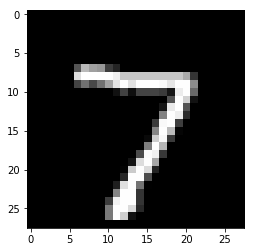

In [4]:
plt.imshow(test_image, cmap="gray")

In [5]:
#X = tf.placeholder(tf.float32,(1,28,28,1))
with tf.Session() as sess:
    saver = tf.train.import_meta_graph("test_model/test_model.meta")
    saver.restore(sess, tf.train.latest_checkpoint("./test_model/"))
    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("X:0")
    keep_prob = graph.get_tensor_by_name("keep_prob:0")
    test_image = np.reshape(test_image,[1,28,28,1])
    feed_dict = {X: test_image, keep_prob:1}
    Y = graph.get_tensor_by_name("Y:0")
    print(sess.run(Y, feed_dict=feed_dict))
    test_out = tf.argmax(Y, axis=1)
    print "test out = ", sess.run(test_out, feed_dict=feed_dict)

INFO:tensorflow:Restoring parameters from ./test_model/test_model
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
test out =  [7]
